In [1]:
import pandas as pd
df=pd.read_csv('https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/data-static/data/module-2/rate_by_city.csv')

In [2]:
df.head()

,Rate,City
0,13.75,1
1,13.75,1
2,13.50,1
3,13.50,1
4,13.00,1


In [3]:
from scipy.stats import f_oneway

In [4]:
df.shape

(54, 2)

In [6]:
df['city_count']=df.groupby('City').cumcount()

In [8]:
df_pivot=df.pivot(index='city_count',columns='City',values='Rate')

In [14]:
df_pivot.columns=['City_'+str(i) for i in df_pivot.columns]

In [15]:
df_pivot

,City_1,City_2,City_3,City_4,City_5,City_6
city_count,,,,,,
0,13.75,14.25,14.00,15.00,14.50,13.50
1,13.75,13.00,14.00,14.00,14.00,12.25
2,13.50,12.75,13.51,13.75,14.00,12.25
3,13.50,12.50,13.50,13.59,13.90,12.00
4,13.00,12.50,13.50,13.25,13.75,12.00
5,13.00,12.40,13.25,12.97,13.25,12.00
6,13.00,12.30,13.00,12.50,13.00,12.00
7,12.75,11.90,12.50,12.25,12.50,11.90
8,12.50,11.90,12.50,11.89,12.45,11.90


In [16]:
df_pivot.mean()

City_1    13.194444
City_2    12.611111
City_3    13.306667
City_4    13.244444
City_5    13.483333
City_6    12.200000
dtype: float64

In [35]:
f_oneway(df_pivot.City_1,df_pivot.City_2,df_pivot.City_3,df_pivot.City_4,df_pivot.City_5,df_pivot.City_6)

F_onewayResult(statistic=4.8293848737024, pvalue=0.001174551414504048)

In [34]:
f_oneway(df_pivot.City_1,df_pivot.City_3,df_pivot.City_4)

F_onewayResult(statistic=0.05909131997668963, pvalue=0.9427573893060512)

In [30]:
import statsmodels.api as sm

In [31]:
from statsmodels.formula.api import ols

In [32]:
model=ols('Rate ~ C(City)',data=df).fit()

In [43]:
anova_table=sm.stats.anova_lm(model,typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(City),10.945667,5.0,4.829385,0.001175
Residual,21.758133,48.0,NaN,NaN


In [37]:
?sm.stats.anova_lm

In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rate   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     4.829
Date:                Tue, 19 Nov 2019   Prob (F-statistic):            0.00117
Time:                        10:30:16   Log-Likelihood:                -52.080
No. Observations:                  54   AIC:                             116.2
Df Residuals:                      48   BIC:                             128.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.1944      0.224     58.793      0.000      12.743      13.646
C(City)[T.2]    -0.5833      0.317     -1.838      0.072      -1.221       0.055
C(City)[T.3]     0.1122      0.317      0.354      0.725      -0.526       0.750
C(City)[T.4]     0.0500      0.317      0.158      0.875      -0.588       0.688
C(City)[T.5]     0.2889      0.317      0.910      0.367      -0.349       0.927
C(City)[T.6]    -0.9944      0.317     -3.133      0.003      -1.633      -0.356
==============================================================================
Omnibus:                        3.616   Durbin-Watson:                   1.477
Prob(Omnibus):                  0.164   Jarque-Bera (JB):                2.624
Skew:                           0.487   Prob(JB):                        0.269
Kurtosis:                       3.466   Cond. No.                         6.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
df=pd.read_csv(r'C:\Users\eldiy\Documents\GitHub\data-labs-oct\module-2\lab-matplotlib-seaborn\your-code\Fitbit2.csv')

In [46]:
df.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


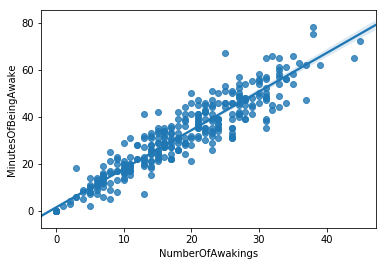

In [48]:
import seaborn as sns
sns.regplot(x='NumberOfAwakings',y='MinutesOfBeingAwake',data=df)

In [49]:
from scipy.stats import linregress

In [51]:
X=df.NumberOfAwakings
y=df.MinutesOfBeingAwake
slope,intercept,r_value,pvalue,std_error=linregress(X,y)

In [59]:
f'MinutesOfBeingAwake = {round(intercept,2)} + {round(slope,2)} * NumberOfAwakings'

'MinutesOfBeingAwake = 1.44 + 1.64 * NumberOfAwakings'

In [54]:
pvalue # variable Number of Awakings is significant

1.885191872908422e-189

In [55]:
r_value # correlation between the actual data and prediction

0.9518168284473624

In [58]:
r_value**2 # r_squared of the model

0.9059552749155957

In [61]:
model=sm.OLS(y,X)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared (uncentered):                   0.971
Model:                             OLS   Adj. R-squared (uncentered):              0.971
Method:                  Least Squares   F-statistic:                          1.218e+04
Date:                 Tue, 19 Nov 2019   Prob (F-statistic):                   4.88e-283
Time:                         15:27:37   Log-Likelihood:                         -1161.7
No. Observations:                  367   AIC:                                      2325.
Df Residuals:                      366   BIC:                                      2329.
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
NumberOfAwakings     1.7022      0.015    110.383      0.000       1.672       1.733
==============================================================================
Omnibus:                       13.367   Durbin-Watson:                   1.790
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               28.053
Skew:                           0.092   Prob(JB):                     8.10e-07
Kurtosis:                       4.342   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
model=ols('MinutesOfBeingAwake ~ NumberOfAwakings+Yesterday_sleep_efficiency+Months',data=df)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.914
Model:                             OLS   Adj. R-squared:                  0.911
Method:                  Least Squares   F-statistic:                     290.3
Date:                 Tue, 19 Nov 2019   Prob (F-statistic):          1.77e-179
Time:                         15:50:50   Log-Likelihood:                -1140.7
No. Observations:                  367   AIC:                             2309.
Df Residuals:                      353   BIC:                             2364.
Df Model:                           13                                         
Covariance Type:             nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      5.5492      1.340      4.142      0.000       2.914       8.184
Months[T.August]              -4.7582      1.414     -3.364      0.001      -7.540      -1.977
Months[T.December]            -5.4653      1.427     -3.830      0.000      -8.271      -2.659
Months[T.February]            -4.6044      1.433     -3.214      0.001      -7.422      -1.787
Months[T.January]             -3.7960      1.415     -2.682      0.008      -6.579      -1.013
Months[T.July]                -0.4155      1.417     -0.293      0.769      -3.202       2.371
Months[T.June]                -2.1388      1.427     -1.499      0.135      -4.945       0.667
Months[T.March]               -4.8842      1.425     -3.427      0.001      -7.687      -2.081
Months[T.May]                 -4.5936      1.417     -3.242      0.001      -7.380      -1.807
Months[T.November]            -3.9770      1.439     -2.763      0.006      -6.808      -1.146
Months[T.October]             -4.3926      1.433     -3.065      0.002      -7.211      -1.574
Months[T.September]           -4.7993      1.438     -3.338      0.001      -7.627      -1.971
NumberOfAwakings               1.6269      0.028     58.296      0.000       1.572       1.682
Yesterday_sleep_efficiency    -0.0030      0.009     -0.336      0.737      -0.021       0.015
==============================================================================
Omnibus:                        7.936   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.019   Jarque-Bera (JB):               10.222
Skew:                           0.193   Prob(JB):                      0.00603
Kurtosis:                       3.721   Cond. No.                     1.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
pd.get_dummies(data=df,columns=[col1,col2,col3], drop_first=True)

In [ ]:
y=df.col1
X=df.drop(col1,axis=1)

In [70]:
df.Months

0        May
1        May
2        May
3        May
4        May
5        May
6        May
7        May
8        May
9        May
10       May
11       May
12       May
13       May
14       May
15       May
16       May
17       May
18       May
19       May
20       May
21       May
22       May
23       May
24      June
25      June
26      June
27      June
28      June
29      June
       ...  
337    April
338    April
339    April
340    April
341    April
342    April
343    April
344    April
345    April
346    April
347    April
348    April
349    April
350    April
351    April
352    April
353    April
354    April
355    April
356    April
357    April
358    April
359    April
360      May
361      May
362      May
363      May
364      May
365      May
366      May
Name: Months, Length: 367, dtype: object